# Heart Failure Prediction Using Machine Learning Algorithms

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [14]:
# libraries 
## Data manipulation 
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [4]:
# Reading file
df = pd.read_csv(r"D:\Dataset\heart.csv");
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up,0
381,50,M,ASY,115,0,0,Normal,120,Y,0.5,Flat,1
497,61,M,ASY,146,241,0,Normal,148,Y,3.0,Down,1
713,64,F,NAP,140,313,0,Normal,133,N,0.2,Up,0
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0
612,55,M,ASY,122,223,1,ST,100,N,0.0,Flat,1
264,47,M,NAP,140,193,0,Normal,145,Y,1.0,Flat,1
698,41,M,NAP,130,214,0,LVH,168,N,2.0,Flat,0
401,51,M,ASY,130,0,1,ST,163,N,0.0,Flat,1


Let's break down these columns and their potential relevance to predicting heart disease:

    Age: Age is a crucial factor in heart disease prediction, as older individuals tend to be at higher risk.

    Sex: Gender differences can influence heart disease risk, with males often having a higher risk compared to females.

    ChestPainType: The type of chest pain (e.g., typical angina, atypical angina, non-anginal pain) can be indicative of underlying heart issues and is an essential diagnostic criterion.

    RestingBP: Resting blood pressure is a significant risk factor for heart disease. Elevated blood pressure increases the strain on the heart and is associated with an increased risk of heart failure.

    Cholesterol: High levels of cholesterol, particularly LDL cholesterol, are associated with an increased risk of heart disease.

    FastingBS: Fasting blood sugar levels can indicate the presence of diabetes, which is a significant risk factor for heart disease.

    RestingECG: The resting electrocardiogram (ECG) can provide insights into the heart's electrical activity and help diagnose various heart conditions.

    MaxHR: Maximum heart rate achieved during exercise can be an indicator of cardiovascular fitness and overall heart health.

    ExerciseAngina: Angina experienced during exercise can be a symptom of underlying heart disease.

    Oldpeak: ST depression induced by exercise relative to rest can indicate myocardial ischemia and is a marker of significant coronary artery disease.

    ST_Slope: The slope of the ST segment during exercise stress testing can provide additional information about myocardial ischemia.

    HeartDisease: This column likely represents the target variable indicating the presence or absence of heart disease. This will be the label that you'll aim to predict based on the other features.

## Data Preprocessing

In [5]:
# Checking data types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# Checking duplicated values
df.duplicated().sum()

0

In [9]:
# checking null values 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# Checking the shape of the dataset
df.shape

(918, 12)

### Exploratory Data  Analysis (EDA)

In [11]:
# Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [12]:
# including object
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [13]:
# Counting the numbers of people having heart diseases
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

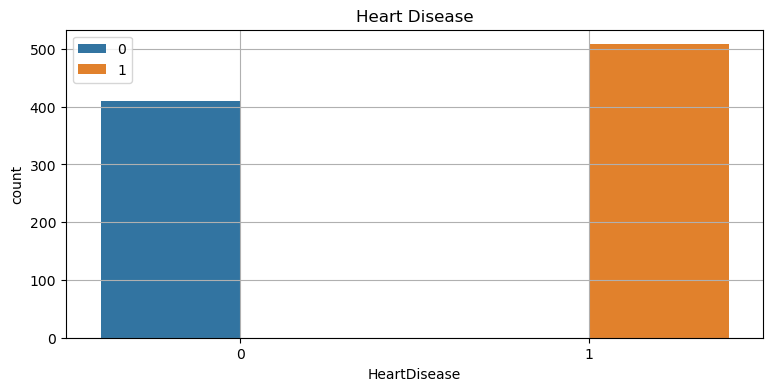

In [37]:
# visualization 
plt.figure(figsize=(9,4))
sns.countplot(x=df['HeartDisease'] , hue=df['HeartDisease'])
plt.grid(True)
plt.title("Heart Disease")
plt.legend()
plt.show()

In [28]:
# number of unique values in each columns
print("Number of unique values in each column")
print("*"*40)
df.nunique()

Number of unique values in each column
****************************************


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

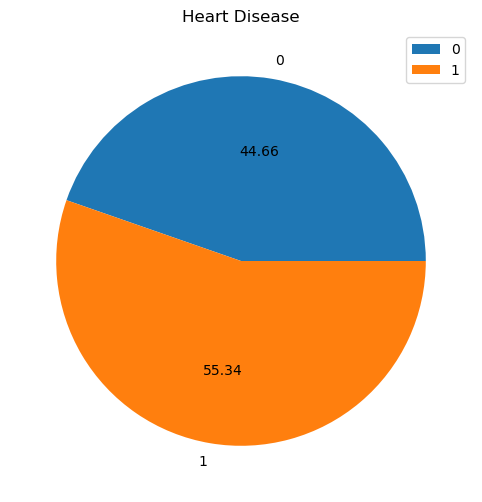

In [34]:
# visualization 
plt.figure(figsize=(9,6))
plt.title("Heart Disease")
plt.pie(df.groupby(by=['HeartDisease']).size() , labels=df['HeartDisease'].unique(), autopct = "%0.2f")
plt.legend()
plt.show()

In [38]:
# Chestpaintype 
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

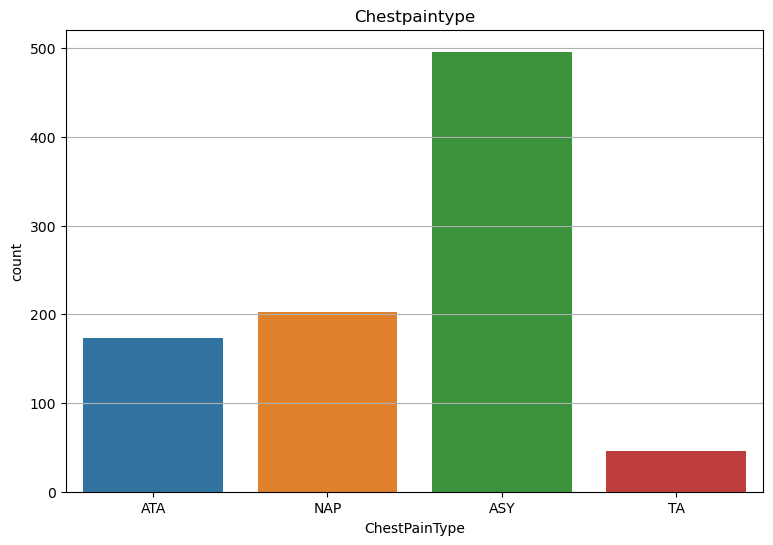

In [41]:
# visualization 
plt.figure(figsize=(9,6))
plt.title("Chestpaintype")
plt.grid(True)
sns.countplot(x=df['ChestPainType'] )
plt.show()

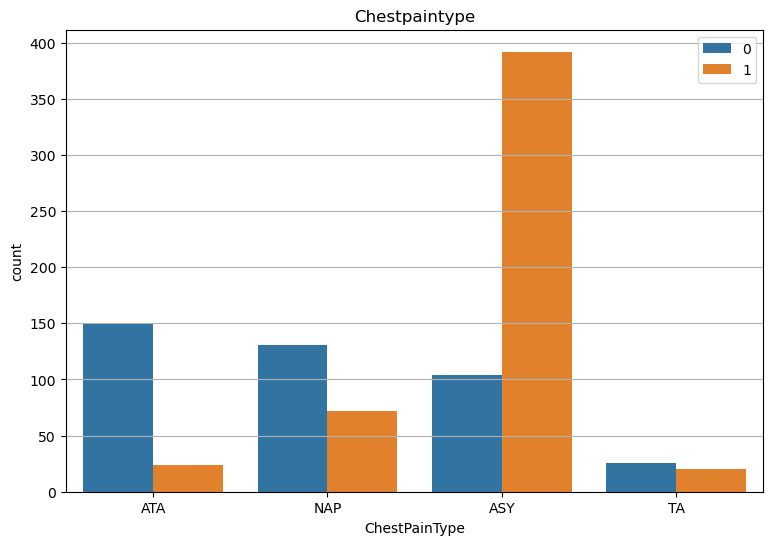

In [42]:
# visualization 
plt.figure(figsize=(9,6))
plt.title("Chestpaintype")
plt.grid(True)
sns.countplot(x=df['ChestPainType'] , hue=df['HeartDisease'])
plt.legend()
plt.show()

In [43]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

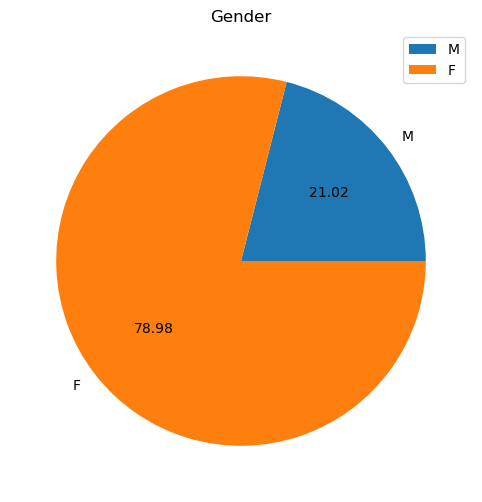

In [47]:
# visualization
plt.figure(figsize=(8,6))
plt.title("Gender")
plt.pie(df.groupby(by=['Sex']).size() , labels=['M' , 'F'] , autopct="%0.2f")
plt.legend()
plt.show()

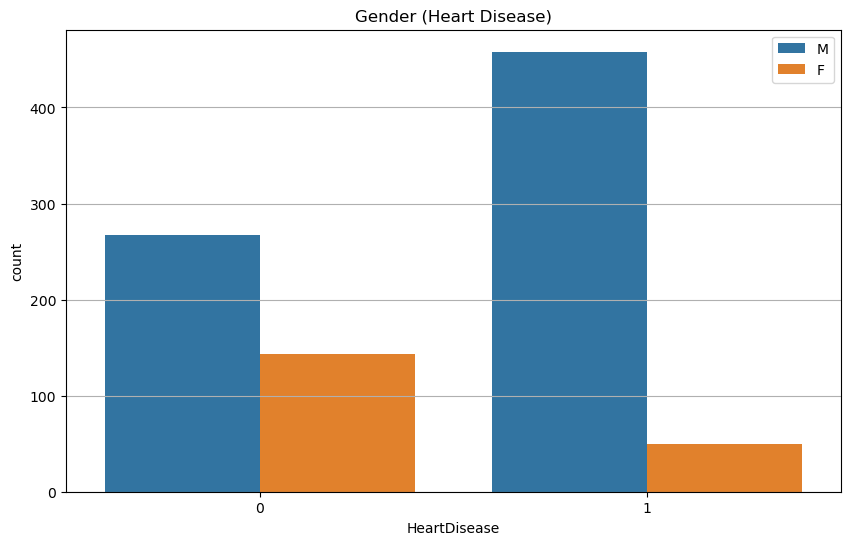

In [48]:
# visualization
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Gender (Heart Disease)")
sns.countplot(data=df , x='HeartDisease' , hue='Sex')
plt.legend()
plt.show()

In [56]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

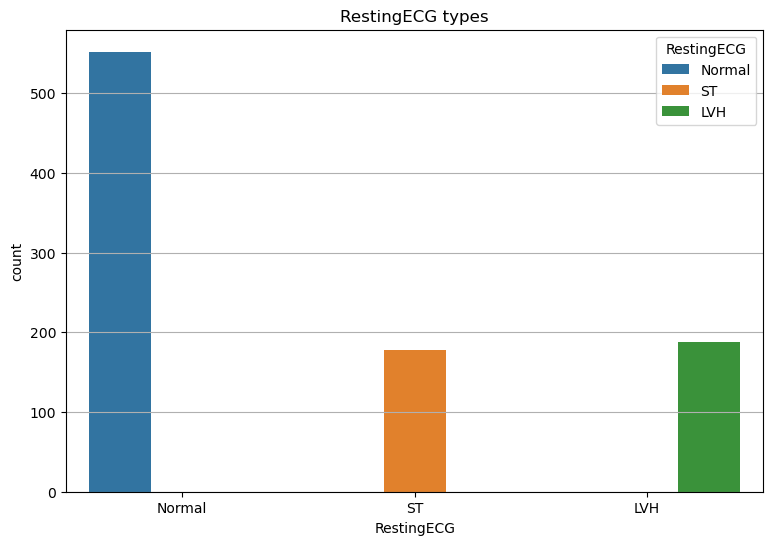

In [57]:
#visualization
plt.figure(figsize=(9,6))
plt.grid(True)
plt.title("RestingECG types")
sns.countplot(data=df , x='RestingECG', hue='RestingECG')
plt.show()

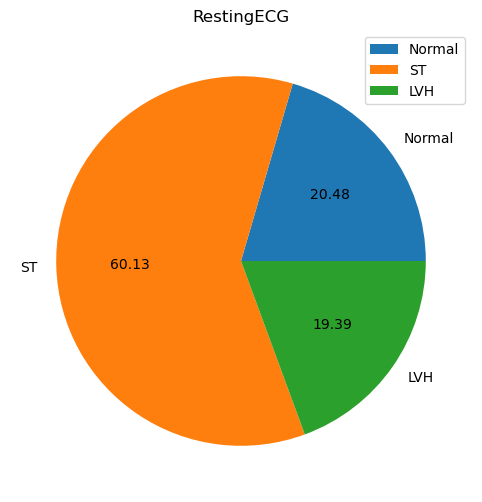

In [65]:
# visualization
plt.figure(figsize=(8,6))
plt.title("RestingECG")
plt.pie(df.groupby(by='RestingECG').size(), labels=df['RestingECG'].unique() , autopct="%0.2f")
plt.legend()
plt.show()

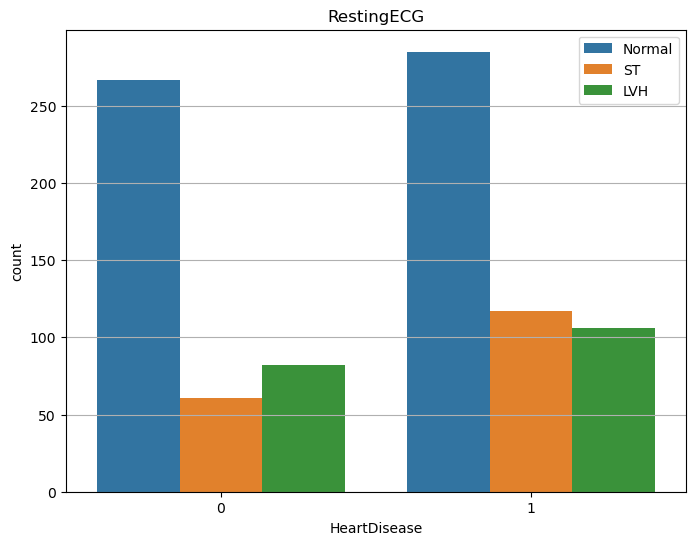

In [66]:
# visualization
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title("RestingECG")
sns.countplot(data=df , x='HeartDisease' , hue='RestingECG')
plt.legend()
plt.show()

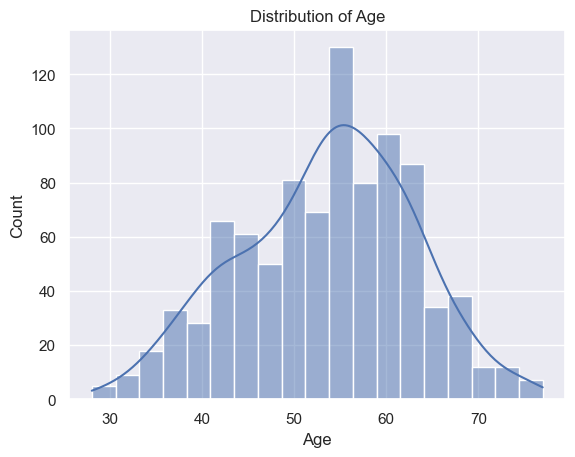

In [69]:
# Distribution of numerical data 
sns.set_theme()
plt.title("Distribution of Age")
sns.histplot(data=df , x='Age' , kde=True)
plt.show()

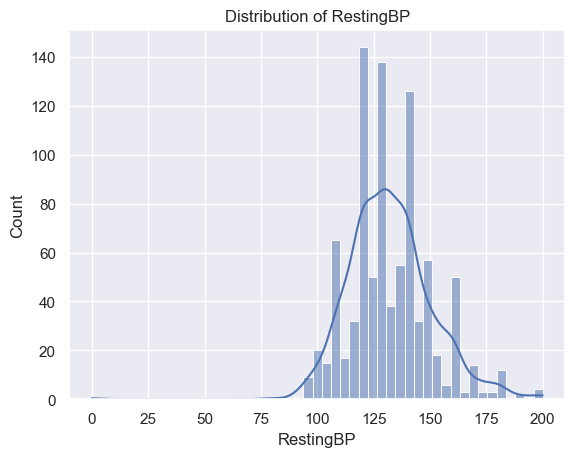

In [71]:
# Distribution of numerical data 
sns.set_theme()
plt.title("Distribution of RestingBP")
sns.histplot(data=df , x='RestingBP' , kde=True)
plt.show()

In [70]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


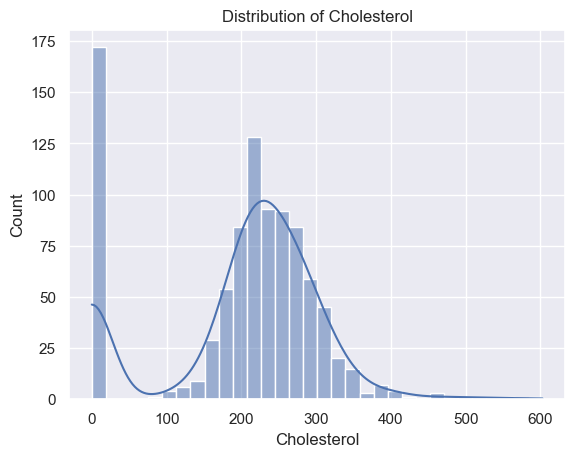

In [72]:
# Distribution of numerical data 
sns.set_theme()
plt.title("Distribution of Cholesterol")
sns.histplot(data=df , x='Cholesterol' , kde=True)
plt.show()

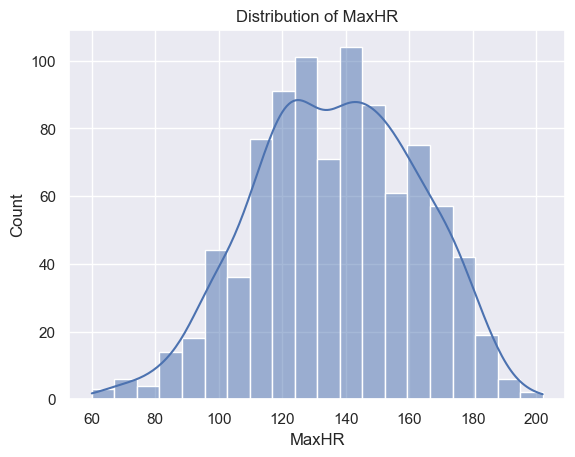

In [73]:
# Distribution of numerical data 
sns.set_theme()
plt.title("Distribution of MaxHR")
sns.histplot(data=df , x='MaxHR' , kde=True)
plt.show()

### Feature Extractions

In [74]:
# featuring 
features = df.drop(columns=['HeartDisease'] , axis=1)
target = df['HeartDisease']
print(f"these are the feature : {features}")
print(f"target  is: {target}")

these are the feature :      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
0      172       

In [75]:
# one-hot encoding 
X = pd.get_dummies(features , dtype=float , drop_first=True)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,57,130,236,0,174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Machine Learning Algorithm

In [76]:
# Logistic algorithm
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, target , test_size=0.2 , random_state=2)

In [79]:
# shape of training and testing data
print("Shape of X training set " ,X_train.shape)
print("Shape of X testing set " ,X_test.shape)
print("Shape of y training set " ,y_train.shape)
print("Shape of y testing set " ,y_test.shape)

Shape of X training set  (734, 15)
Shape of X testing set  (184, 15)
Shape of y training set  (734,)
Shape of y testing set  (184,)


In [80]:
# importing logistic  regression model
from sklearn.linear_model import LogisticRegression

In [81]:
# initializing our model
logi = LogisticRegression()

In [82]:
# training our model with training data
logi.fit(X_train , y_train)

c:\Users\Amit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# predicting the outcome.
y_pred = logi.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [88]:
# libraries
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [86]:
# Confusion matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[70, 19],
       [11, 84]], dtype=int64)

In [87]:
# checking the accuracy of our model on test data
accuracy_score(y_test , y_pred)

0.8369565217391305

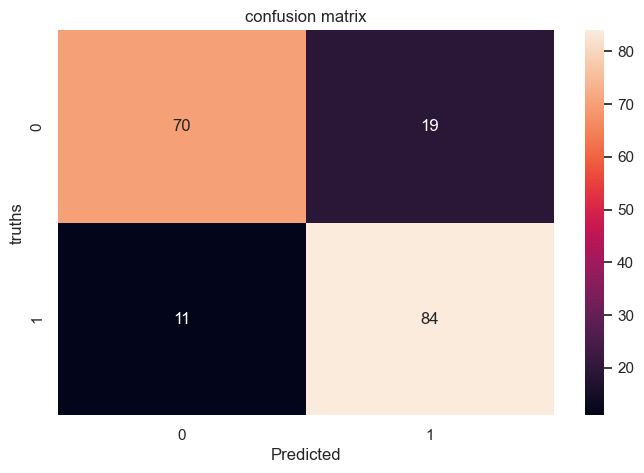

In [91]:
# visualization 
plt.figure(figsize=(8,5))
sns.heatmap(cm , annot=True)
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("truths")
plt.show()

In [93]:
# Checking out the classification report 
print("Classification report : \n", classification_report(y_test , y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        89
           1       0.82      0.88      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### Project Goal :- 
The goal of a heart failure prediction project is to develop a machine learning model that can accurately predict the likelihood of an individual experiencing heart failure based on a set of input features. Heart failure is a serious medical condition where the heart is unable to pump blood effectively to meet the body's needs, leading to symptoms such as shortness of breath, fatigue, and fluid retention.

By leveraging data such as demographic information, medical history, lifestyle factors, and clinical measurements, the aim is to create a predictive model that can assist healthcare professionals in identifying individuals who are at a higher risk of developing heart failure. Early detection and intervention can lead to better management of the condition, improved outcomes for patients, and potentially reduced healthcare costs.

The heart failure prediction project typically involves several key steps, including data collection and preprocessing, feature selection and engineering, model training and evaluation, and deployment of the predictive model in a clinical setting. The ultimate objective is to build a robust and accurate predictive tool that can aid in the early identification and management of individuals at risk of heart failure, ultimately contributing to better patient care and outcomes.